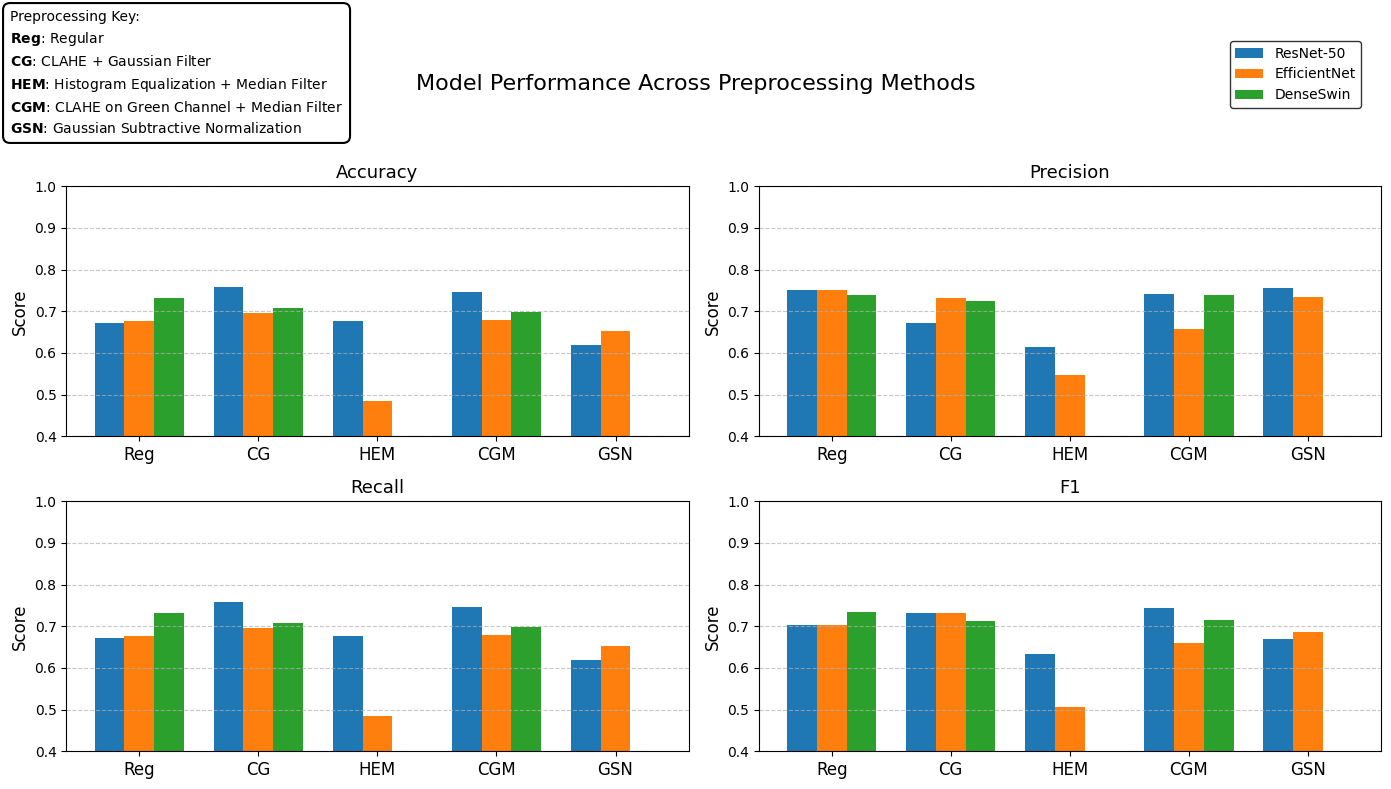

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
preprocessing_methods = ['Regular', 'CLAHE + Gaussian Filter', 'Histogram Equalization + Median Filter', 'CLAHE on Green Channel + Median Filter', 'Gaussian Subtractive Normalization']
short_labels = ['Reg', 'CG', 'HEM', 'CGM', 'GSN']
models = ['ResNet-50', 'EfficientNet', 'DenseSwin']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

scores = np.array([
    # Accuracy
    [
        [0.6709, 0.6762, 0.7328],  # Method A
        [0.7580, 0.6961, 0.7068],  # Method B
        [0.6767, 0.4840, 0.0],  # Method C
        [0.7467, 0.6780, 0.6972],  # Method D
        [0.6184, 0.6526, 0.0]   # Method E
    ],
    # Precision
    [
        [0.7503, 0.7501, 0.7380],
        [0.6729, 0.7312, 0.7243],
        [0.6155, 0.5480, 0.0],
        [0.7407, 0.6572, 0.7381],
        [0.7567, 0.7335, 0.0]
    ],
    # Recall
    [
        [0.6709, 0.6762, 0.7328],
        [0.7580, 0.6961, 0.7068],
        [0.6767, 0.4840, 0.0],
        [0.7467, 0.6780, 0.6972],
        [0.6184 , 0.6526, 0.0]
    ],
    # F1 Score
    [
        [0.7033, 0.7036, 0.7336],
        [0.7317, 0.7317, 0.7121],
        [0.6344, 0.5070, 0.0],
        [0.7432, 0.6611, 0.7144],
        [0.6698, 0.6869, 0.0]
    ]
])

# Plotting
x = np.arange(len(short_labels))  # positions for groups
width = 0.25  # width of each bar

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # One color per model

for idx, ax in enumerate(axes):
    for model_idx, model_name in enumerate(models):
        offset = (model_idx - 1) * width
        ax.bar(x + offset, scores[idx, :, model_idx], width, label=model_name, color=colors[model_idx])

    ax.set_title(metrics[idx], fontsize=13)
    ax.set_xticks(x)
    ax.set_xticklabels(short_labels, fontsize=12)
    ax.set_ylim(0.4, 1.0)
    ax.set_ylabel('Score', fontsize=12)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Legend once for all subplots
legend = fig.legend(models, loc='upper right', fontsize='medium', bbox_to_anchor=(0.98, 0.95))
legend.get_frame().set_edgecolor('black')

# Add explanation for short labels below the plots
label_lines = [r"$\bf{" + short + r"}$: " + full for short, full in zip(short_labels, preprocessing_methods)]
label_text = "Preprocessing Key:\n" + "\n".join(label_lines)

# Draw the text box in the upper left
fig.text(0.01, 0.98, label_text, ha='left', va='top', fontsize=10, linespacing=1.5)

# Add a rectangle around the text manually using a patch
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor='black', facecolor='white', linewidth=1.5)

# Add an annotation box with dummy text and override it with our label
fig.text(0.01, 0.98, label_text, ha='left', va='top', fontsize=10,
         linespacing=1.5, bbox=bbox_props)

fig.suptitle('Model Performance Across Preprocessing Methods', fontsize=16, y=0.9)
plt.tight_layout(rect=[0, 0, 1, 0.85]) 
plt.show()
